# Importings

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Exploratory data analysis

In [9]:
data=pd.read_csv('Uber Request Data.csv')

In [10]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [143]:
df=data.copy()

In [25]:
df.shape

(6745, 6)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [27]:
df.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [28]:
df.isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

# explore nan values

In [31]:
df[df["Driver id"].isna()]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
4095,1362,City,NaN,No Cars Available,11/7/2016 0:02,NaN
4096,1364,City,NaN,No Cars Available,11/7/2016 0:06,NaN
4097,1366,City,NaN,No Cars Available,11/7/2016 0:09,NaN
4098,2,Airport,NaN,No Cars Available,11/7/2016 0:23,NaN
4099,7,Airport,NaN,No Cars Available,11/7/2016 0:30,NaN
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [32]:
df[df['Status']=='No Cars Available']

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
4095,1362,City,NaN,No Cars Available,11/7/2016 0:02,NaN
4096,1364,City,NaN,No Cars Available,11/7/2016 0:06,NaN
4097,1366,City,NaN,No Cars Available,11/7/2016 0:09,NaN
4098,2,Airport,NaN,No Cars Available,11/7/2016 0:23,NaN
4099,7,Airport,NaN,No Cars Available,11/7/2016 0:30,NaN
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [35]:
df[df['Drop timestamp'].isna()]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1.0,Cancelled,13-07-2016 06:08:41,NaN
2832,4805,City,1.0,Cancelled,14-07-2016 17:07:58,NaN
2833,5202,Airport,1.0,Cancelled,14-07-2016 20:51:37,NaN
2834,5927,City,1.0,Cancelled,15-07-2016 10:12:40,NaN
2835,2347,Airport,2.0,Cancelled,12/7/2016 19:14,NaN
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


# dealing with driver id

In [36]:
df[df['Driver id']==0]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp


In [37]:
(df['Driver id']==0).sum()

0

In [38]:
df['Driver id'].fillna(0,inplace=True)

In [39]:
df['Driver id']=df['Driver id'].astype(str)

In [42]:
df.dtypes

Request id            int64
Pickup point         object
Driver id            object
Status               object
Request timestamp    object
Drop timestamp       object
dtype: object

In [43]:
df=df.astype({'Request id':'str','Driver id':'str'})

In [44]:
df.dtypes

Request id           object
Pickup point         object
Driver id            object
Status               object
Request timestamp    object
Drop timestamp       object
dtype: object

<AxesSubplot:ylabel='Status'>

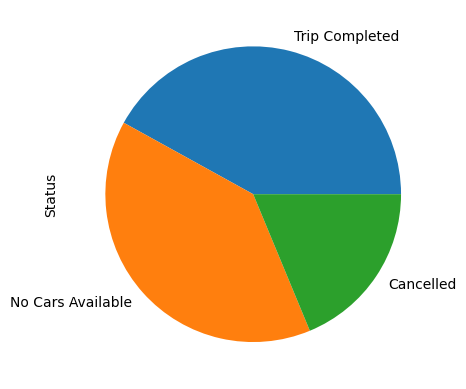

In [48]:
df['Status'].value_counts().plot(kind='pie')

<AxesSubplot:xlabel='Status', ylabel='count'>

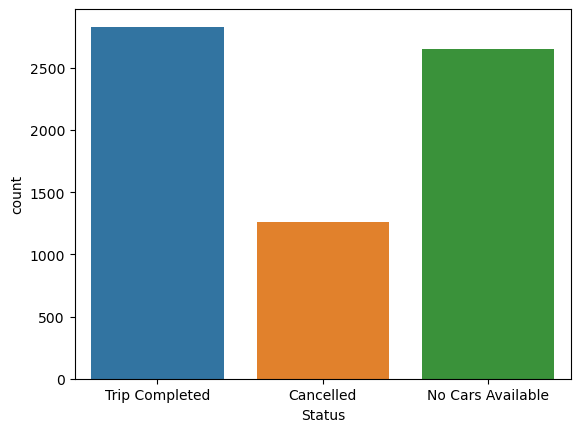

In [47]:
sns.countplot(x='Status',data=df)

# dealing with drop timestamp

In [51]:
df[df['Drop timestamp'].isna()]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1.0,Cancelled,13-07-2016 06:08:41,NaN
2832,4805,City,1.0,Cancelled,14-07-2016 17:07:58,NaN
2833,5202,Airport,1.0,Cancelled,14-07-2016 20:51:37,NaN
2834,5927,City,1.0,Cancelled,15-07-2016 10:12:40,NaN
2835,2347,Airport,2.0,Cancelled,12/7/2016 19:14,NaN
...,...,...,...,...,...,...
6740,6745,City,0.0,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,0.0,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,0.0,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,0.0,No Cars Available,15-07-2016 23:54:39,NaN


In [53]:
(df['Status']=='Cancelled').sum()

1264

In [55]:
df['Request timestamp']=pd.to_datetime(df['Request timestamp'])

In [56]:
df.dtypes

Request id                   object
Pickup point                 object
Driver id                    object
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp               object
dtype: object

In [57]:
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'])

In [58]:
df.dtypes

Request id                   object
Pickup point                 object
Driver id                    object
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

# Analysis

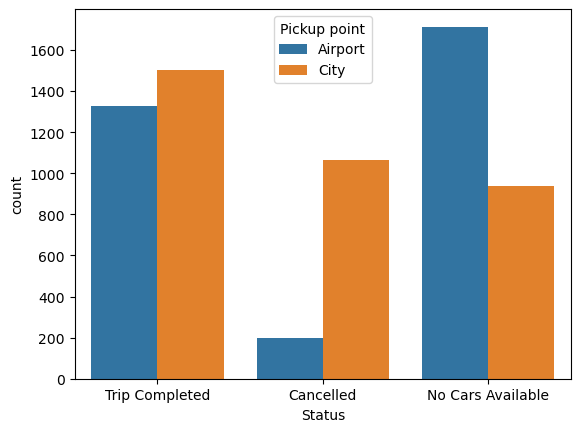

In [59]:
sns.countplot('Status',hue='Pickup point', data=df)
plt.show()

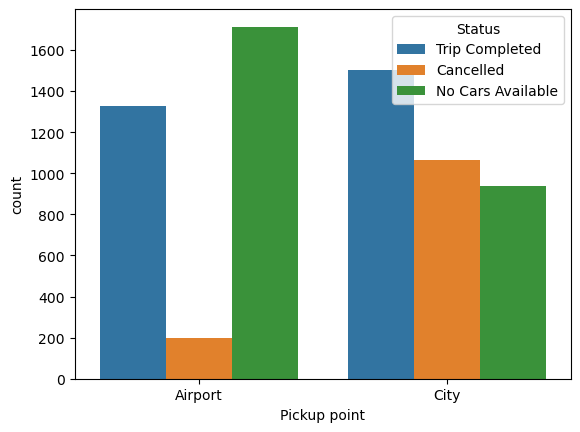

In [60]:
sns.countplot('Pickup point',hue='Status', data=df)
plt.show()

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

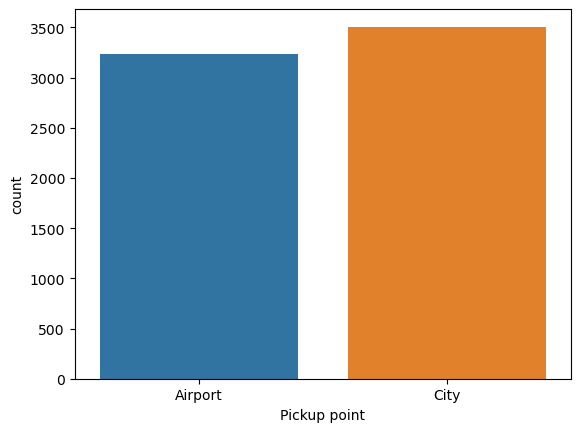

In [61]:
sns.countplot('Pickup point',data=df)

# Completed Trips

# What is the most 5 successful driver?

In [68]:
df['Driver id']=df['Driver id'].astype(float)

In [69]:
df['Driver id']=df['Driver id'].astype(int)

In [70]:
df['Driver id']=df['Driver id'].astype(str)

In [75]:
df.dtypes

Request id                   object
Pickup point                 object
Driver id                    object
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

In [71]:
df2=df[df['Status']=='Trip Completed']

In [72]:
df2

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
2826,1315,Airport,300,Trip Completed,2016-11-07 22:54:00,2016-11-07 23:35:00
2827,2924,City,300,Trip Completed,2016-07-13 06:31:22,2016-07-13 07:20:52
2828,3324,Airport,300,Trip Completed,2016-07-13 12:33:21,2016-07-13 13:16:03
2829,3935,Airport,300,Trip Completed,2016-07-13 22:26:08,2016-07-13 23:43:13


In [73]:
df2['Driver id'].value_counts().nlargest(5)

22     16
233    15
184    15
126    14
107    14
Name: Driver id, dtype: int64

<AxesSubplot:>

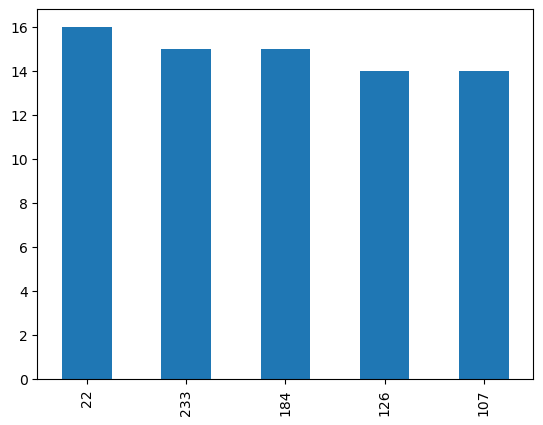

In [74]:
df2['Driver id'].value_counts().nlargest(5).plot(kind='bar')

<AxesSubplot:>

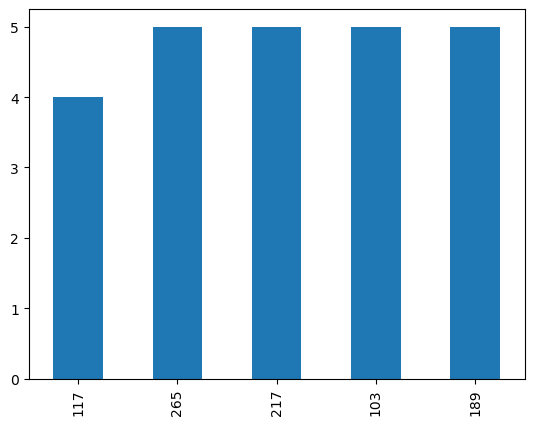

In [76]:
df2['Driver id'].value_counts().nsmallest(5).plot(kind='bar')

In [78]:
df2.dtypes

Request id                   object
Pickup point                 object
Driver id                    object
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

In [80]:
df['Drop timestamp']-df['Request timestamp']

0      0 days
1      0 days
2      0 days
3      0 days
4      0 days
        ...  
6740   0 days
6741   0 days
6742   0 days
6743   0 days
6744   0 days
Length: 6745, dtype: timedelta64[ns]

In [81]:
df2['Drop timestamp']-df2['Request timestamp']

0      0 days 01:09:00
1      0 days 00:50:00
2      0 days 00:41:00
3      0 days 00:55:00
4      0 days 00:52:31
             ...      
2826   0 days 00:41:00
2827   0 days 00:49:30
2828   0 days 00:42:42
2829   0 days 01:17:05
2830   0 days 00:48:58
Length: 2831, dtype: timedelta64[ns]

# What is the month with the highest completed rides

# What is the day with the highest completed rides

In [82]:
df2['Drop timestamp'].dt.month

0       11
1       11
2       12
3       12
4        7
        ..
2826    11
2827     7
2828     7
2829     7
2830     7
Name: Drop timestamp, Length: 2831, dtype: int64

In [100]:
df2['Drop timestamp'].dt.year

0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
2826    2016
2827    2016
2828    2016
2829    2016
2830    2016
Name: Drop timestamp, Length: 2831, dtype: int64

In [101]:
df2['Request timestamp'].dt.day

0        7
1        7
2        7
3        7
4       13
        ..
2826     7
2827    13
2828    13
2829    13
2830    15
Name: Request timestamp, Length: 2831, dtype: int64

In [102]:
df2['Drop timestamp'].dt.day_name()

0          Monday
1          Monday
2       Wednesday
3       Wednesday
4       Wednesday
          ...    
2826       Monday
2827    Wednesday
2828    Wednesday
2829    Wednesday
2830       Friday
Name: Drop timestamp, Length: 2831, dtype: object

In [103]:
completed_time_info=pd.DataFrame()

In [105]:
completed_time_info['day_name']=df2['Request timestamp'].dt.day_name()
completed_time_info['day']=df2['Request timestamp'].dt.day
completed_time_info['month']=df2['Request timestamp'].dt.month
completed_time_info['year']=df2['Request timestamp'].dt.year
completed_time_info['Pickup']=df2['Pickup point']

In [107]:
completed_time_info

,day_name,day,month,year,Pickup
0,Monday,7,11,2016,Airport
1,Monday,7,11,2016,Airport
2,Wednesday,7,12,2016,City
3,Wednesday,7,12,2016,Airport
4,Wednesday,13,7,2016,City
...,...,...,...,...,...
2826,Monday,7,11,2016,Airport
2827,Wednesday,13,7,2016,City
2828,Wednesday,13,7,2016,Airport
2829,Wednesday,13,7,2016,Airport


<AxesSubplot:xlabel='month', ylabel='count'>

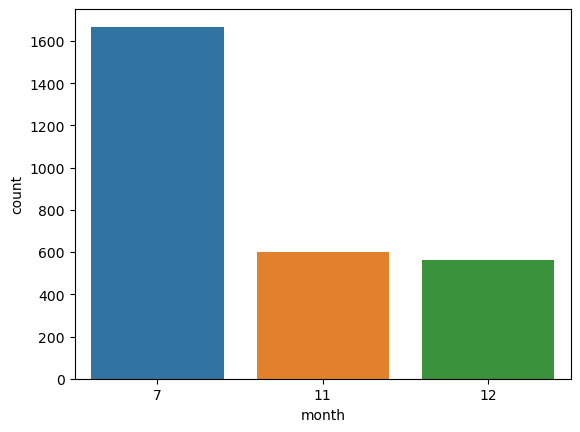

In [106]:
sns.countplot('month', data=completed_time_info)

<AxesSubplot:xlabel='day', ylabel='count'>

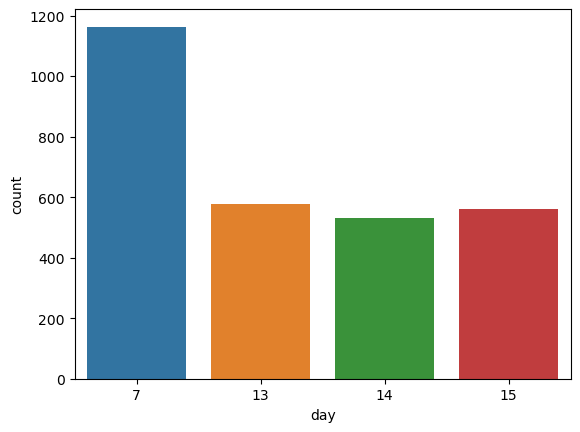

In [187]:
sns.countplot('day', data=completed_time_info)

<AxesSubplot:xlabel='year', ylabel='count'>

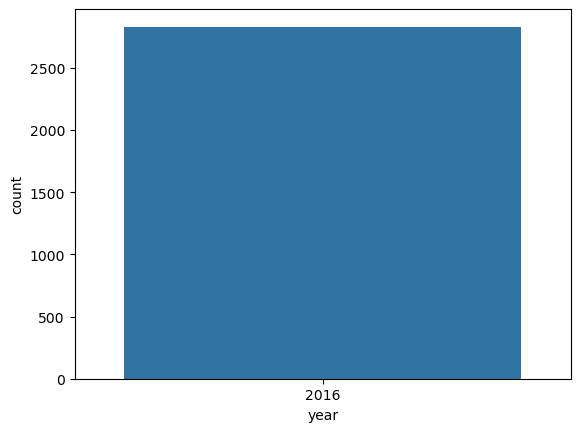

In [109]:
sns.countplot('year', data=completed_time_info)

<AxesSubplot:xlabel='day_name', ylabel='count'>

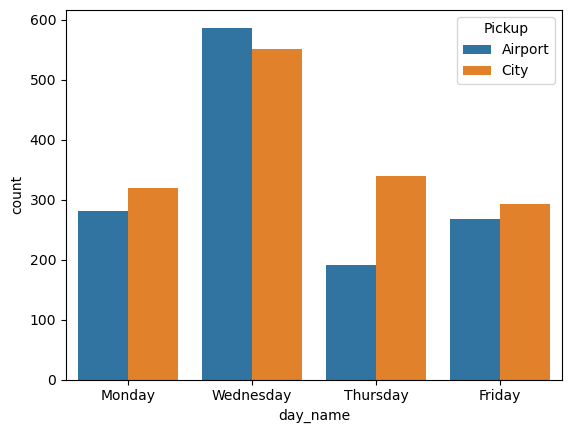

In [112]:
sns.countplot('day_name', data=completed_time_info, hue='Pickup')

# How many drivers the company have?

In [113]:
# 300 beacuse we excluded the zeros
df['Driver id'].nunique() 

301

# what is the average travel time?

In [118]:
df2['TimeDifference']=df2['Drop timestamp']-df2['Request timestamp']

In [119]:
df2['TimeDifference'].dt.components

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,0,1,9,0,0,0,0
1,0,0,50,0,0,0,0
2,0,0,41,0,0,0,0
3,0,0,55,0,0,0,0
4,0,0,52,31,0,0,0
...,...,...,...,...,...,...,...
2826,0,0,41,0,0,0,0
2827,0,0,49,30,0,0,0
2828,0,0,42,42,0,0,0
2829,0,1,17,5,0,0,0


In [120]:
df2['TimeDifference'].dt.components.minutes

0        9
1       50
2       41
3       55
4       52
        ..
2826    41
2827    49
2828    42
2829    17
2830    48
Name: minutes, Length: 2831, dtype: int64

In [127]:
df2['average_time']=df2['TimeDifference'].dt.components.minutes+(df2['TimeDifference'].dt.components.hours*60)+(df2['TimeDifference'].dt.components.seconds/60)

In [129]:
df2['average_time']=df2['average_time'].apply(np.ceil).astype(int)

In [ ]:
df2['average_time'].max

In [138]:
df2['average_time'].mean()

52.701872129989404

In [136]:
avarge=df2['average_time'].sum()/df2['average_time'].count()

In [137]:
avarge

52.701872129989404

In [130]:
df2

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,TimeDifference,average_time
0,619,Airport,1,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,0 days 01:09:00,69
1,867,Airport,1,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,0 days 00:50:00,50
2,1807,City,1,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,0 days 00:41:00,41
3,2532,Airport,1,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,0 days 00:55:00,55
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,0 days 00:52:31,53
...,...,...,...,...,...,...,...,...
2826,1315,Airport,300,Trip Completed,2016-11-07 22:54:00,2016-11-07 23:35:00,0 days 00:41:00,41
2827,2924,City,300,Trip Completed,2016-07-13 06:31:22,2016-07-13 07:20:52,0 days 00:49:30,50
2828,3324,Airport,300,Trip Completed,2016-07-13 12:33:21,2016-07-13 13:16:03,0 days 00:42:42,43
2829,3935,Airport,300,Trip Completed,2016-07-13 22:26:08,2016-07-13 23:43:13,0 days 01:17:05,78


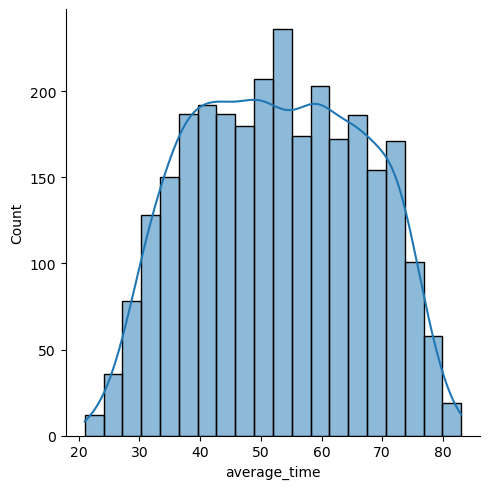

In [139]:
sns.displot(x='average_time',data=df2, kde=True)

In [117]:
pd.to_datetime(df2['Drop timestamp']).dt.hour

0       13
1       18
2        9
3       22
4        9
        ..
2826    23
2827     7
2828    13
2829    23
2830     9
Name: Drop timestamp, Length: 2831, dtype: int64

 # what is the maximum travel time?

In [133]:
df2['average_time'].max()

83

# what is the minimum travel time?

In [134]:
df2['average_time'].min()

21

# No available cars

In [145]:
nocars=df[df['Status']=='No Cars Available']

In [147]:
nocars.drop(['Drop timestamp','Driver id','Request id','Status'],inplace=True, axis=1)

In [156]:
nocars['Request timestamp']=pd.to_datetime(df['Request timestamp'])

In [157]:
nocars

,Pickup point,Request timestamp
4095,City,2016-11-07 00:02:00
4096,City,2016-11-07 00:06:00
4097,City,2016-11-07 00:09:00
4098,Airport,2016-11-07 00:23:00
4099,Airport,2016-11-07 00:30:00
...,...,...
6740,City,2016-07-15 23:49:03
6741,Airport,2016-07-15 23:50:05
6742,City,2016-07-15 23:52:06
6743,City,2016-07-15 23:54:39


In [155]:
# sns.countplot('Pickup point',data=nocars, hue='Request timestamp')

In [158]:
nocars.dtypes

Pickup point                 object
Request timestamp    datetime64[ns]
dtype: object

In [162]:
nocars['month']=nocars['Request timestamp'].dt.month

In [163]:
nocars['year']=nocars['Request timestamp'].dt.year

In [165]:
nocars['day']=nocars['Request timestamp'].dt.day

In [166]:
nocars['day_name']=nocars['Request timestamp'].dt.day_name()

In [167]:
nocars

,Pickup point,Request timestamp,month,year,day,day_name
4095,City,2016-11-07 00:02:00,11,2016,7,Monday
4096,City,2016-11-07 00:06:00,11,2016,7,Monday
4097,City,2016-11-07 00:09:00,11,2016,7,Monday
4098,Airport,2016-11-07 00:23:00,11,2016,7,Monday
4099,Airport,2016-11-07 00:30:00,11,2016,7,Monday
...,...,...,...,...,...,...
6740,City,2016-07-15 23:49:03,7,2016,15,Friday
6741,Airport,2016-07-15 23:50:05,7,2016,15,Friday
6742,City,2016-07-15 23:52:06,7,2016,15,Friday
6743,City,2016-07-15 23:54:39,7,2016,15,Friday


<AxesSubplot:xlabel='day_name', ylabel='count'>

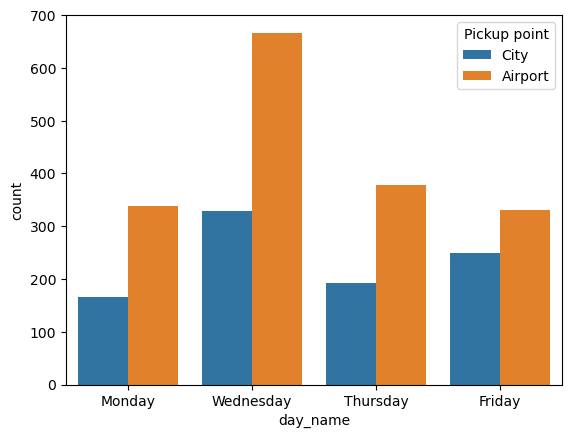

In [169]:
sns.countplot('day_name',data=nocars,hue='Pickup point')

<AxesSubplot:xlabel='month', ylabel='count'>

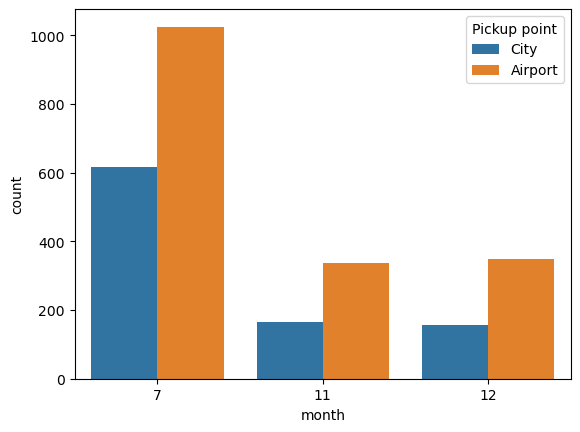

In [171]:
sns.countplot('month',data=nocars,hue='Pickup point')

<AxesSubplot:xlabel='year', ylabel='count'>

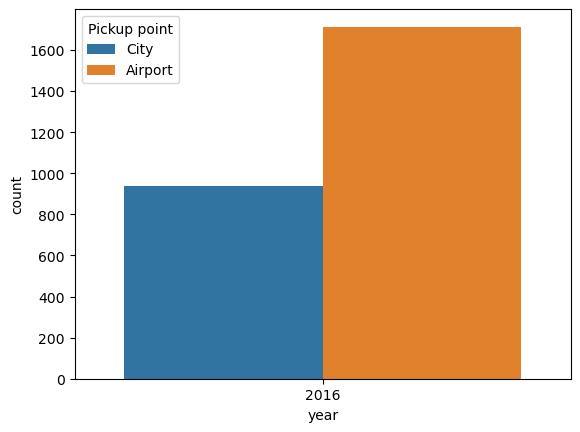

In [172]:
sns.countplot('year',data=nocars,hue='Pickup point')

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

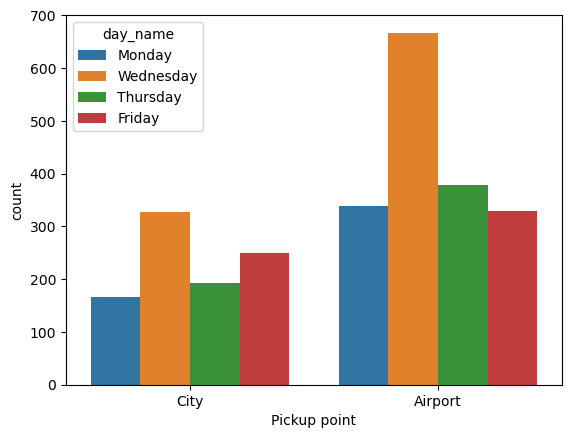

In [173]:
sns.countplot('Pickup point',data=nocars,hue='day_name')

In [176]:
df['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [177]:
cancel_Df=df[df['Status']=='Cancelled']

In [178]:
cancel_Df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1.0,Cancelled,13-07-2016 06:08:41,NaN
2832,4805,City,1.0,Cancelled,14-07-2016 17:07:58,NaN
2833,5202,Airport,1.0,Cancelled,14-07-2016 20:51:37,NaN
2834,5927,City,1.0,Cancelled,15-07-2016 10:12:40,NaN
2835,2347,Airport,2.0,Cancelled,12/7/2016 19:14,NaN
...,...,...,...,...,...,...
4090,1641,City,299.0,Cancelled,12/7/2016 7:20,NaN
4091,4158,City,299.0,Cancelled,14-07-2016 05:03:10,NaN
4092,4164,City,299.0,Cancelled,14-07-2016 05:06:40,NaN
4093,4448,City,299.0,Cancelled,14-07-2016 08:30:59,NaN


In [181]:
cancel_Df.drop(['Drop timestamp','Request id','Status'],inplace=True, axis=1)

In [182]:
cancel_Df

,Pickup point,Driver id,Request timestamp
2831,City,1.0,13-07-2016 06:08:41
2832,City,1.0,14-07-2016 17:07:58
2833,Airport,1.0,14-07-2016 20:51:37
2834,City,1.0,15-07-2016 10:12:40
2835,Airport,2.0,12/7/2016 19:14
...,...,...,...
4090,City,299.0,12/7/2016 7:20
4091,City,299.0,14-07-2016 05:03:10
4092,City,299.0,14-07-2016 05:06:40
4093,City,299.0,14-07-2016 08:30:59


In [183]:
cancel_Df['Request timestamp']=pd.to_datetime(cancel_Df['Request timestamp'])

In [186]:
cancel_Df.dtypes

Pickup point                 object
Driver id                   float64
Request timestamp    datetime64[ns]
dtype: object